<a href="https://colab.research.google.com/github/AshwiniPushkarr/-Linear-Regresion/blob/main/RandomForrestOB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

# New Section

# New Section

In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

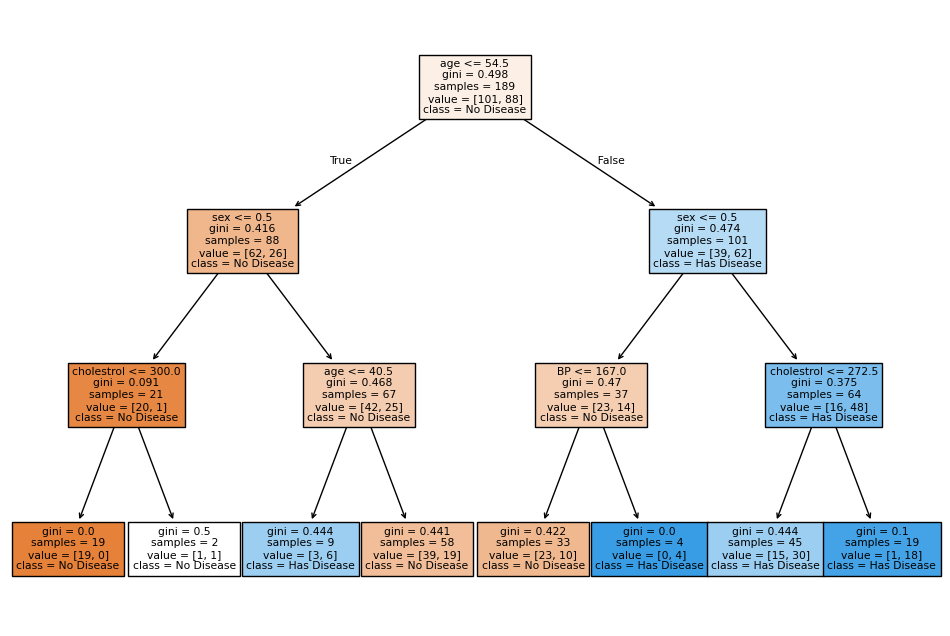

In [7]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X_train.columns, class_names=['No Disease', 'Has Disease'], filled=True)
plt.show()

In [8]:
# Using random Forest DecisionTreeClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


In [11]:
y_train.head()

,heart disease
84,0
251,0
92,1
201,1
126,1


In [12]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10)

In [13]:
rf.fit(X_train, y_train)
print(rf)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)


In [14]:
print(vars(rf))

{'estimator': DecisionTreeClassifier(), 'n_estimators': 10, 'estimator_params': ('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha', 'monotonic_cst'), 'bootstrap': True, 'oob_score': False, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False, 'class_weight': None, 'max_samples': None, 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'monotonic_cst': None, 'ccp_alpha': 0.0, 'feature_names_in_': array(['age', 'sex', 'BP', 'cholestrol'], dtype=object), 'n_features_in_': 4, '_n_samples': 189, 'n_outputs_': 1, 'classes_': array([0, 1]), 'n_classes_': 2, '_n_samples_bootstrap': 189, 'estimator_': DecisionTreeClassifier(), 'estimators_': [DecisionTreeClassifier(max_depth=3, max_features='sqrt',
        

In [15]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

In [16]:
print(rf.estimators_[9])


DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1914837113)


In [17]:
!pip install six
!pip install pydotplus graphviz

In [18]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [19]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10)
# Fit the RandomForestClassifier to the training data
rf.fit(X_train, y_train) # This line is crucial to create the 'estimators_' attribute
#sample_tree = rf.estimators_[4]
sample_tree = rf.estimators_[4]

In [20]:
#sample_tree = rf.estimators_[4]
#sample_tree = rf.estimators_[4]

In [21]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns,
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

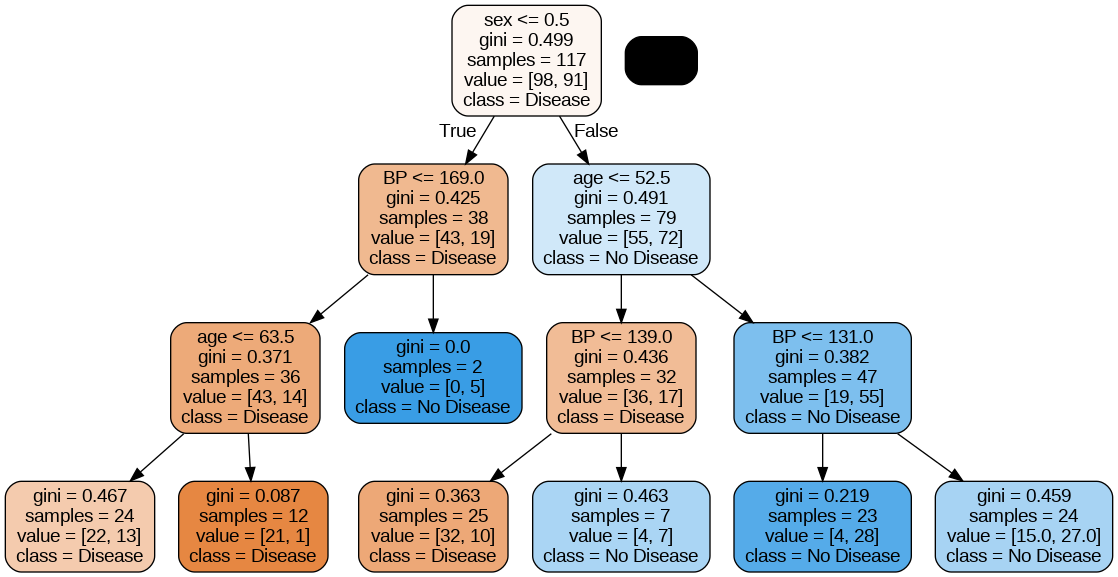

In [22]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())